<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2003%20-%20Aprendizado%20N%C3%A3o%20Supervisionado%20/T%C3%B3pico%2003%20-%20Aprendizado%20-%20N%C3%A3o%20Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado Não Supervisionado (Clusterização)


O aprendizado não supervisionado é uma abordagem do aprendizado de máquina em que não temos rótulos ou informações prévias sobre as classes ou categorias dos dados. Em vez disso, o objetivo é encontrar padrões e estruturas ocultas nos dados, agrupando-os de acordo com suas características comuns. O clustering, uma técnica do aprendizado não supervisionado, permite agrupar os dados em clusters ou grupos de objetos semelhantes.

Neste tutorial, vamos explorar um dos algoritmos de clustering mais populares, o K-Means.

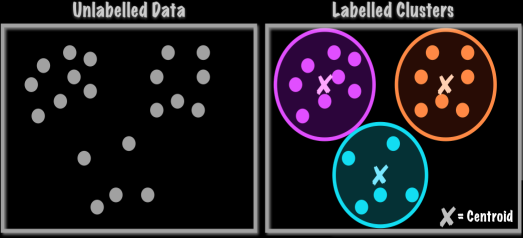

##Criando um dataset sintético

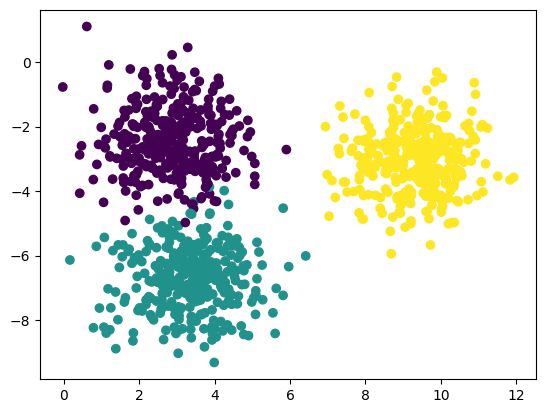

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

seed = 30
K_DATASET = 3

# Cria um conjunto de dados com 1000 pontos, 3 clusters e desvio padrão de 1.5
X, y = make_blobs(n_samples=1000, centers=K_DATASET, cluster_std=1.0, random_state=seed)

# Plota os dados

plt.scatter(X[:, 0], X[:, 1], c=y)


#plt.scatter(X[:, 0], X[:, 1], c=y, color=colors)
plt.show()



#K-Means (Implementção Própria)



*   Selecione K centróides aleatóriamente
*   Atribua cada instância ao centróide (cluster) mais próximo
*   Re-calcule os centróides
*   Verifica se não houve mudanças




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import mode

class MY_KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X, plot=False):
        # Inicializa os centros dos clusters aleatoriamente
        self.centers = X[np.random.choice(len(X), self.k, replace=False), :]

        # Executa o algoritmo K-Means
        for i in range(self.max_iters):          
            
            # Atribui cada ponto ao cluster mais próximo
            #Perceba que nenhuma informação de classe (y) é utilizada
            distances = np.sqrt(np.sum((X - self.centers[:, np.newaxis]) ** 2, axis=2))
            labels = np.argmin(distances, axis=0)

            # Verifica se o algoritmo convergiu
            old_centers = self.centers.copy()
            for k in range(self.k):
                self.centers[k] = np.mean(X[labels == k], axis=0)

            if np.allclose(old_centers, self.centers, rtol=0, atol=self.tol):
                #print(f"Algoritmo convergiu após {i+1} iterações.")
                break

            # Plota os dados e os centros dos clusters
            if plot:
              plt.scatter(X[:, 0], X[:, 1], c=labels)
              plt.scatter(self.centers[:, 0], self.centers[:, 1], marker='*', color='k', s=100)
              plt.title(f"Iteração {i+1}")
              plt.show()

        # Armazena as atribuições de rótulo dos pontos
        self.labels = labels

    def predict(self, X):
        # Atribui cada ponto ao cluster mais próximo
        distances = np.sqrt(np.sum((X - self.centers[:, np.newaxis]) ** 2, axis=2))
        labels = np.argmin(distances, axis=0)
        return labels
    
    def inertia(self,X):
      # Calcular a inércia
      inertia = 0.0
      for i in range(len(X)):
        centroid = self.centers[self.labels[i]]
        inertia += np.sum((X[i] - centroid) ** 2)

      return inertia

##Treinamento e análises

Centros dos clusters:
[[ 9.30635052 -3.07677168]
 [ 2.88902184 -2.42290914]
 [ 3.33516927 -6.74536967]]
Rótulos dos pontos:
[1 2 0 0 0 1 2 2 1 1]
[0 1 2 2 2 0 1 1 0 0]


<ipython-input-3-8041ee2b84b9>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


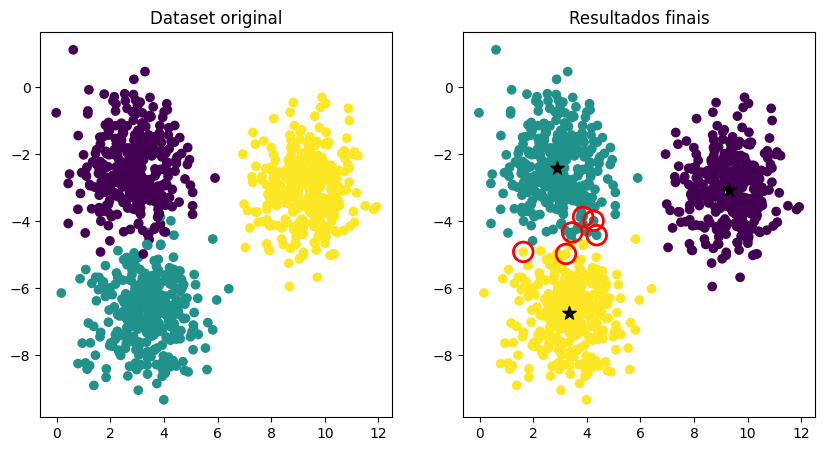

In [3]:
# Executa o algoritmo K-Means nos dados de exemplo
K = np.unique(y).shape[0]
my_kmeans = MY_KMeans(k=K,max_iters=30)
my_kmeans.fit(X,plot=False)

# Imprime os resultados
print("Centros dos clusters:")
print(my_kmeans.centers)
print("Rótulos dos pontos:")
print(my_kmeans.labels[:10])
print(y[:10])

labels = np.zeros_like(my_kmeans.labels)
for i in range(3):
    mask = (my_kmeans.labels == i)
    labels[mask] = mode(y[mask])[0]


# Plota os dados de exemplo e os centros dos clusters finais

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# Exibir a figura

axs[0].scatter(X[:, 0], X[:, 1], c=y)    
axs[1].scatter(X[:, 0], X[:, 1], c=my_kmeans.labels)

missed = X[labels != y]

#Aqui fazemos uma analise de erro para ilustrar, mas em teoria não temos os rótulos
axs[1].scatter(missed[:, 0], missed[:, 1], s=200, facecolors='none', edgecolors='r', linewidths=2)



axs[1].scatter(my_kmeans.centers[:, 0], my_kmeans.centers[:, 1], marker='*', color='k', s=100)

axs[0].set_title("Dataset original")
axs[1].set_title("Resultados finais")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


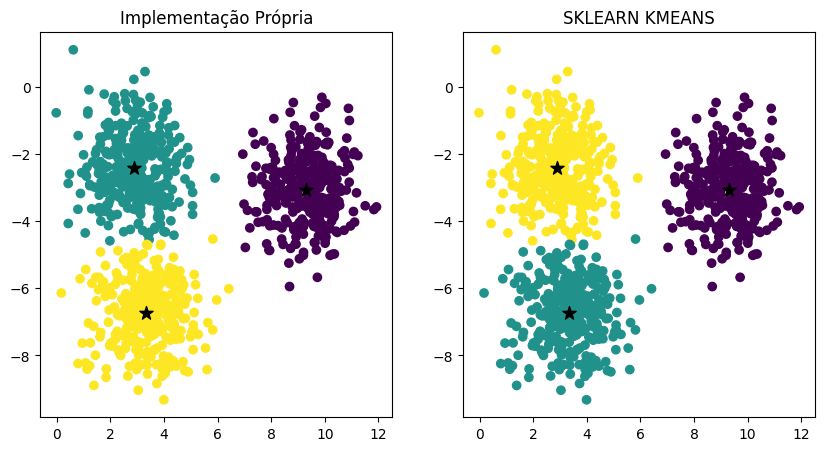

In [4]:
from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=3,max_iter=30,random_state=seed)  
sk_kmeans.fit(X)

# Plota os dados de exemplo e os centros dos clusters finais

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# Exibir a figura

axs[0].scatter(X[:, 0], X[:, 1], c=my_kmeans.labels)    
axs[0].scatter(my_kmeans.centers[:, 0], my_kmeans.centers[:, 1], marker='*', color='k', s=100)

axs[1].scatter(X[:, 0], X[:, 1], c=sk_kmeans.labels_)
axs[1].scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1], marker='*', color='k', s=100)


axs[0].set_title("Implementação Própria")
axs[1].set_title("SKLEARN KMEANS")
plt.show()


# Análise de número de clusteres (K)

Uma pergunta a ser respondida em clusterização é quantos clusteres são adequados ao problema. Assim, vamos utilizar duas conhecidas métricas


*   Inertia
*   Silhoutte



##Inertia 

Quantifica a variabilidade dentro dos clusteres, calculando a soma dos quadrados das distâncias entre cada ponto e o centróide do seu cluster correspondente. Quanto menor o valor da inércia, mais compactos e bem definidos são os clusters. A inércia é uma métrica interna de avaliação, ou seja, é calculada apenas com base nos dados de entrada e nos resultados do algoritmo de clustering. Comparar a inércia para diferentes valores de K pode ajudar a determinar o número ideal de clusters, buscando um ponto de "cotovelo" no gráfico de inércia versus número de clusters.

In [5]:
inertia_vals = []
K_MAX = 15
for k in range(1,K_MAX):  
  kmeans = KMeans(k=k,max_iters=30)  
  kmeans.fit(X,plot=False)
  inertia = kmeans.inertia(X)

  #Tiro a raiz para normalizar
  inertia = np.sqrt(inertia)
  
  print(k,inertia)
  inertia_vals.append(inertia)

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  axs[0].scatter(X[:, 0], X[:, 1], c=y)    
  axs[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels)

  missed = X[labels != y]
  #axs[1].scatter(missed[:, 0], missed[:, 1], s=200, facecolors='none', edgecolors='r', linewidths=2)



  axs[1].scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], marker='*', color='k', s=100)

  axs[0].set_title("Dataset original")
  axs[1].set_title(f"Resultados finais K={k}, Inertia: {inertia}")
  plt.show()


plt.plot(range(1, K_MAX), inertia_vals, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Elbow Point - Valor da Inércia')
plt.show()
  

TypeError: ignored

##Silhoutte

O índice de silhueta é calculado para cada ponto individualmente, levando em consideração a distância média para os outros pontos no mesmo cluster (intra-cluster) e a distância média para os pontos nos clusters vizinhos mais próximos (inter-cluster). O valor da silhueta varia de -1 a 1, onde valores próximos a 1 indicam que o ponto está bem colocado dentro do seu cluster e bem separado dos outros clusters, enquanto valores próximos a -1 indicam que o ponto pode ter sido atribuído ao cluster errado.

Ao calcular o índice de silhueta médio para todos os pontos, podemos obter uma medida geral da qualidade do clustering. Valores mais altos de silhueta indicam clusters mais bem definidos e separados, enquanto valores mais baixos podem indicar sobreposição de clusters ou pontos mal atribuídos.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n_clusters in range(2,10,1):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
    
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

    
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f" Silhouette = {silhouette_avg} para K={n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()